In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
import matplotlib.pyplot as plt
from utils.chart import plot_chart_line


---

## For **prepare_data** function

In [3]:
data = prepare_data()
data

,Close
Date,
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
2000-01-07,1441.469971
...,...
2024-01-25,4894.160156
2024-01-26,4890.970215
2024-01-29,4927.930176


In [4]:
data.dtypes

Close    float64
dtype: object

<module 'matplotlib.pyplot' from 'f:\\DR\\Stock-Market-Prediction\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

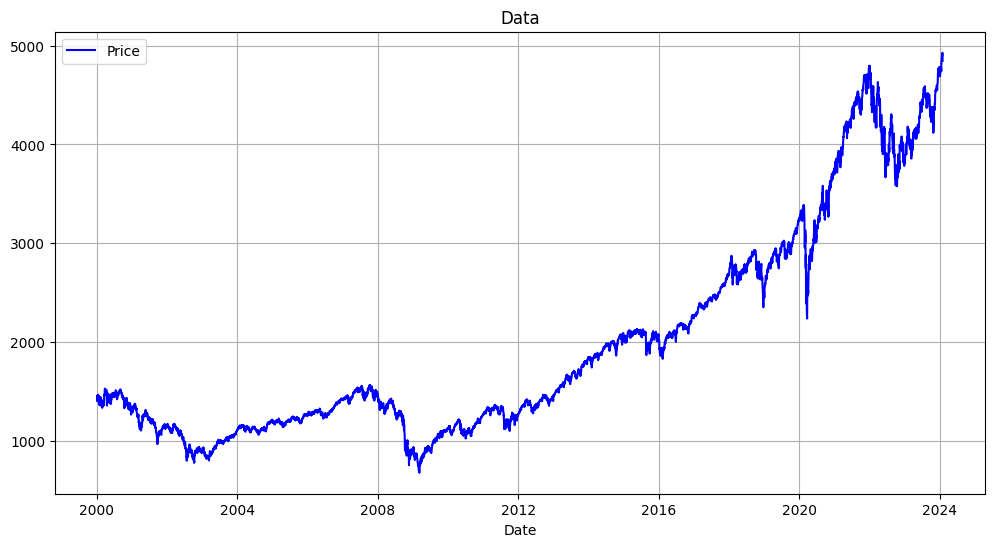

In [5]:
plot_chart_line(data, label='Price', title='Data')

---

## For **normalize_data** function

In [6]:
normalized_data = normalize_data(data)
normalized_data

,Close
Date,
2000-01-03,0.183161
2000-01-04,0.170036
2000-01-05,0.170668
2000-01-06,0.170984
2000-01-07,0.179927
...,...
2024-01-25,0.992057
2024-01-26,0.991306
2024-01-29,1.000000


<module 'matplotlib.pyplot' from 'f:\\DR\\Stock-Market-Prediction\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

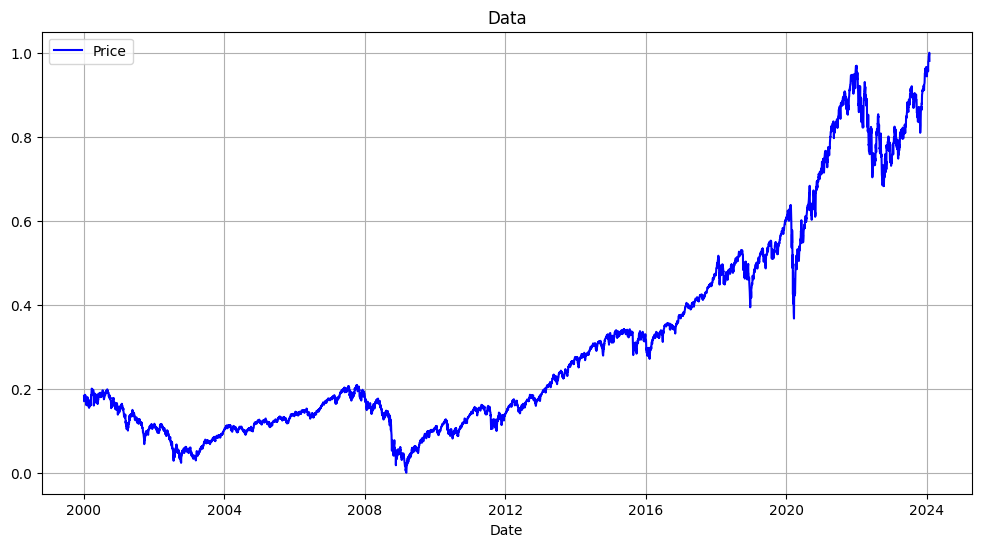

In [7]:
plot_chart_line(normalized_data, label='Price', title='Data')

----

## For **prepare_sequences** function

In [8]:
x, y, dates = prepare_sequences(normalized_data)

In [9]:
x.shape, y.shape, dates.shape

((6053, 5), (6053,), (6053,))

In [10]:
x[0]

array([0.18316082, 0.17003575, 0.17066847, 0.17098365, 0.17992659])

In [11]:
x

array([[0.18316082, 0.17003575, 0.17066847, 0.17098365, 0.17992659],
       [0.17003575, 0.17066847, 0.17098365, 0.17992659, 0.18372064],
       [0.17066847, 0.17098365, 0.17992659, 0.18372064, 0.17924213],
       ...,
       [0.98177071, 0.98510371, 0.98603275, 0.99205673, 0.9913064 ],
       [0.98510371, 0.98603275, 0.99205673, 0.9913064 , 1.        ],
       [0.98603275, 0.99205673, 0.9913064 , 1.        , 0.99930377]])

<module 'matplotlib.pyplot' from 'f:\\DR\\Stock-Market-Prediction\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

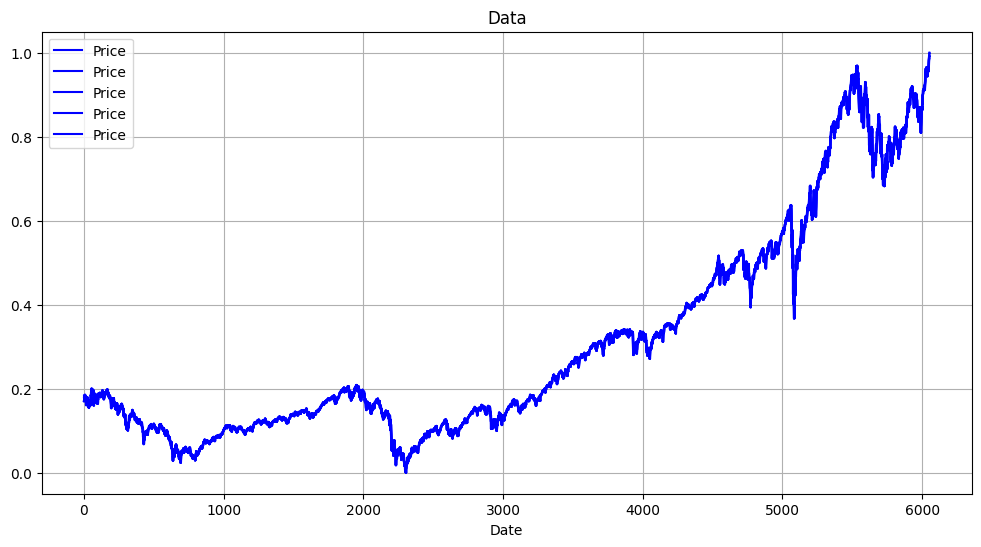

In [12]:
plot_chart_line(x, label='Price', title='Data')

In [13]:
y[0]

0.18372063776093983

In [14]:
y

array([0.18372064, 0.17924213, 0.1777579 , ..., 1.        , 0.99930377,
       0.98064631])

<module 'matplotlib.pyplot' from 'f:\\DR\\Stock-Market-Prediction\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

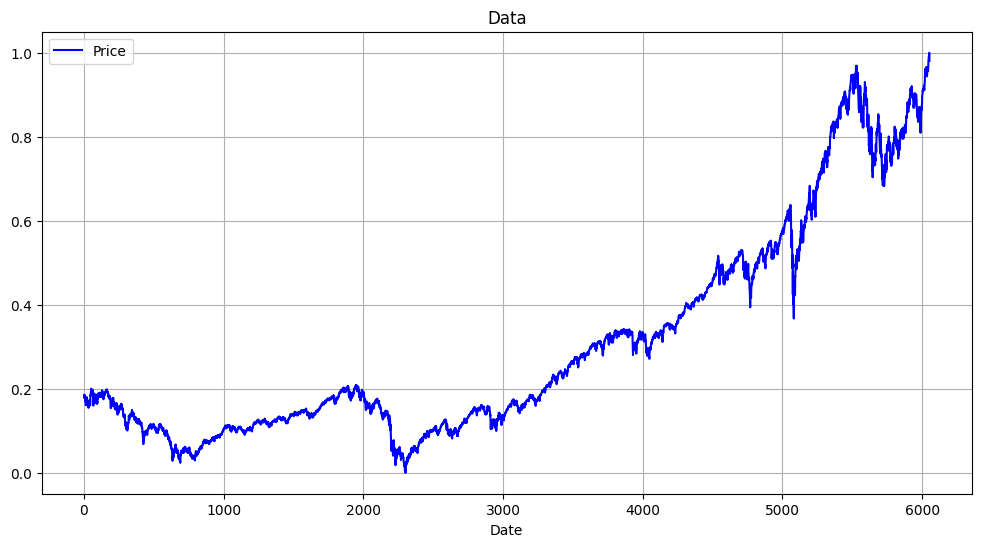

In [15]:
plot_chart_line(y, label='Price', title='Data')

In [16]:
dates

array(['2000-01-10T00:00:00.000000000', '2000-01-11T00:00:00.000000000',
       '2000-01-12T00:00:00.000000000', ...,
       '2024-01-29T00:00:00.000000000', '2024-01-30T00:00:00.000000000',
       '2024-01-31T00:00:00.000000000'], dtype='datetime64[ns]')

---

## For **split_train_and_test_data** function

In [17]:
x_train, x_test, y_train, y_test, dates_train, dates_test = split_train_and_test_data(x, y, dates)

In [18]:
x_train.shape, y_train.shape, dates_train.shape

((4842, 5), (4842,), (4842,))

In [19]:
x_test.shape, y_test.shape, dates_test.shape

((1211, 5), (1211,), (1211,))

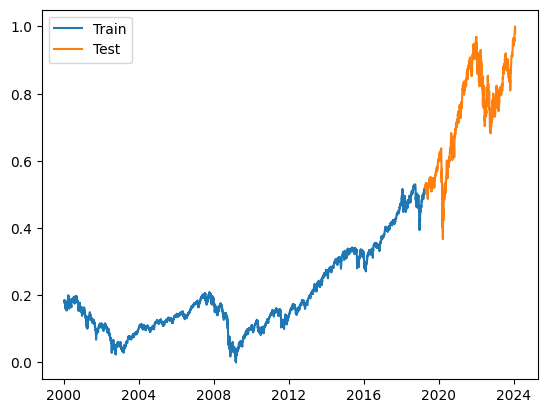

In [20]:
plt.plot(dates_train, y_train)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Test'])

---

## For **prepare_tensors** function

In [21]:
x_train, y_train = prepare_tensors(x_train, y_train)
x_test, y_test = prepare_tensors(x_test, y_test)

In [22]:
x_train.shape, y_train.shape

(TensorShape([4842, 5, 1]), TensorShape([4842]))

In [23]:
print('x_train:', x_train.shape)
print(x_train[0])

x_train: (4842, 5, 1)
tf.Tensor(
[[0.18316083]
 [0.17003575]
 [0.17066847]
 [0.17098366]
 [0.17992659]], shape=(5, 1), dtype=float32)


In [24]:
print('y_train:', y_train.shape)
print(y_train[0])

y_train: (4842,)
tf.Tensor(0.18372063, shape=(), dtype=float32)


In [25]:
x_test.shape, y_test.shape

(TensorShape([1211, 5, 1]), TensorShape([1211]))

In [26]:
print('x_test:',x_test.shape)
print(x_test[0])

x_test: (1211, 5, 1)
tf.Tensor(
[[0.5167403 ]
 [0.51814926]
 [0.5212894 ]
 [0.52200216]
 [0.51786935]], shape=(5, 1), dtype=float32)


In [27]:
print('y_test:',y_test.shape)
print(y_test[0])

y_test: (1211,)
tf.Tensor(0.5202239, shape=(), dtype=float32)


---

## For **get_lstm_data** function

In [28]:
x_train, x_test, y_train, y_test = get_lstm_data()

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(TensorShape([4842, 5, 1]),
 TensorShape([4842]),
 TensorShape([1211, 5, 1]),
 TensorShape([1211]))